# Chapter 1 - An Analysis of the Training Data
Guilherme de Oliveira <br>
9/2/2016

## Introduction
The US Census data set used in this machine learning project has 40 features and close to 200,000 rows, where each row corresponds to a person. The object is to develop a binary classification model that predicts whether or not a person has greater than or less than $50,000 in savings.  

Before any modelling takes place, we begin by analyzing and visualizing the data to make sure we have a clear understanding of its structure. This analysis is described in this Jupyter Notebook, subdivided into the following sections:

<ol>
<li> Training Data Preprocessing
<li> The Continuous Variables
<li> Correlation Analysis
<li> The Nominal Columns
<li> The Nominal Columns with Undefined or Missing Values
<li> Examination of Class Imbalance
<li> Convert Nominal Columns from Dtype Object to Dtype Integer
<li> Feature Importance
<li> Conclusion
</ol>

In Section 1, the training data is loaded into a Pandas DataFrame and some preprocessing is done, like for instance removing duplicate rows.

In Section 2, the continuous variables are examined. There are 6 of these in the data set. Some of these are highly skewed and have large ranges. It may be beneficial to scale these prior to model development.

In Section 3, we conduct a correlation analysis and find that the continuous variables are not correlated.

In Section 4, we examine the nominal columns. There are 15 of these.

In Section 5, we examine the nominal columns that are missing values or have undefined values. There are 19 of these.

In Section 6, we examine the class imbalance, which is quite pronounced: there are approximately 11 times as many rows that have less than 50K in savings than rows that have greater than 50K in savings.

In Section 7, we convert the nominal columns that store text values into integers. This is a necessary step for modelling and is used to calculate the feature importances in Section 7.

In Section 8, we run a Random Forest and Logistic Regression (with L1 regularization) to determine the feature importance. The emphasis here is not to develop and fine tune a classification model, but to find the most important features.

We summarize our findings in Section 9.
<br>
<br>
<br>


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

## 1. Training Data Preprocessing

In [3]:
# the_columns stores tuples of (column_name, continuous/nominal/target, prefix for dummy encoding)
# the dummy encoding was not used in the analysis below but may be used elsewhere
the_columns  = [('age', 'continuous', 'age'), 
            ('class_of_worker', 'nominal', 'class_of_worker'), 
            ('detailed_industry_code', 'nominal', 'det_ind_code'), 
            ('detailed_occupation_code', 'nominal', 'det_occ_code'), 
            ('education', 'nominal', 'edu'), 
            ('wage_per_hour', 'continuous'), 
            ('enrolled_in_edu_last_week', 'nominal', 'edu_last_week'),
            ('marital_status', 'nominal', 'marital_status'),
            ('major_industry_code', 'nominal', 'maj_ind_code'),
            ('major_occupation_code', 'nominal', 'maj_ocptn_code'),
            ('race', 'nominal', 'race'),
            ('hispanic_origin', 'nominal', 'hisp_orgn'),
            ('sex', 'binary', 'sex'),
            ('member_of_labor_union', 'nominal', 'member_of_lbr_un'), 
            ('reason_for_unemployment', 'nominal', 'reason_for_unmplymnt'),
            ('full_or_part_time_employment_stat', 'nominal', 'ft_or_pt_emplymnt_stat'),
            ('capital_gains', 'continuous'),
            ('capital_losses', 'continuous'),
            ('dividends', 'continuous'),
            ('tax_filer', 'nominal', 'tax_filer'),
            ('region_of_previous_residence', 'nominal', 'region_pa'),
            ('state_of_previous_residence', 'nominal', 'state_pa'),
            ('detailed_household_family_stat', 'nominal', 'det_hse_fam_state'),
            ('detailed_household_summary', 'nominal', 'det_hse_summary'),
            ('instance_weight', 'IGNORE'),
            ('migration_code_change_in_msa', 'nominal', 'migr_code_msa'),
            ('migration_code_change_in_reg', 'nominal', 'migr_code_reg'),
            ('migration_code_move_within_reg', 'nominal', 'migr_code_move'),
            ('live_in_this_house_1_yr_ago', 'nominal', 'live_in_house_1_yr_ago'),
            ('migration_prev_res_in_sunbelt', 'nominal', 'migr_prev_res_sunbelt'),
            ('num_persons_worked_for_employer', 'continuous'),
            ('family_members_under_18', 'nominal', 'family_under_18'),
            ('cob_father', 'nominal', 'cob_father'),
            ('cob_mother', 'nominal', 'cob_mother'),
            ('cob_self', 'nominal', 'cob_self'),
            ('citizenship', 'nominal', 'citizenship'),
            ('own_business_or_self_employed', 'nominal', 'owner_or_se'),
            ('fill_in_questionnaire_for_veterans_admin', 'nominal', 'veterans_admin'),
            ('veterans_benefits', 'nominal', 'veterans_benefits'),
            ('weeks_worked_in_year', 'nominal', 'weeks_worked_in_yr'),
            ('year', 'year', 'year'),
            ('savings','target'),]


In [4]:
raw_data = pd.read_csv('us_census_full/census_income_learn.csv', names=[c[0] for c in the_columns], index_col=False)

Because of this:
> <i>The instance weight indicates the number of people in the population that each record represents due to stratified sampling. To do real analysis and derive conclusions, this field must be used. This attribute should *not* be used in the classifiers, so it is set to "ignore" in this file.

We drop the ***instance_weight*** field.

In [5]:
raw_data.drop('instance_weight', axis=1, inplace=True)
the_columns.remove(('instance_weight', 'IGNORE'))

In [6]:
original_shape = raw_data.shape
print '\nThe raw data (minus the instance_weight variable) has {:d} rows and {:d} columns.'.format(
    original_shape[0], original_shape[1]) 
print 'As a sanity check, this agrees with the number of lines (199523) obtained using the "wc -l" Unix command.\n'
assert original_shape[0] == 199523, "The number of rows is incorrect"

# note the original unaltered file contains 199523 lines as verified using Unix wc command:
# > wc -l census_income_learn.csv
# 199523


The raw data (minus the instance_weight variable) has 199523 rows and 41 columns.
As a sanity check, this agrees with the number of lines (199523) obtained using the "wc -l" Unix command.



In [7]:
raw_data.head().transpose()

,0,1,2,3,4
age,73,58,18,9,10
class_of_worker,Not in universe,Self-employed-not incorporated,Not in universe,Not in universe,Not in universe
detailed_industry_code,0,4,0,0,0
detailed_occupation_code,0,34,0,0,0
education,High school graduate,Some college but no degree,10th grade,Children,Children
wage_per_hour,0,0,0,0,0
enrolled_in_edu_last_week,Not in universe,Not in universe,High school,Not in universe,Not in universe
marital_status,Widowed,Divorced,Never married,Never married,Never married
major_industry_code,Not in universe or children,Construction,Not in universe or children,Not in universe or children,Not in universe or children
major_occupation_code,Not in universe,Precision production craft & repair,Not in universe,Not in universe,Not in universe


### Eliminate Duplicate Rows

In [8]:
# find the duplicate rows, keep the first one
duplicate_rows = raw_data.duplicated(keep='first')

print '\nnumber of duplicates = {:d}'.format(duplicate_rows.sum())
raw_data = raw_data.drop_duplicates(keep='first')
new_shape =  raw_data.shape
print 'number of duplicates removed = {:d}'.format(original_shape[0] - new_shape[0])
print 'new shape = {:d}, {:d}\n'.format(raw_data.shape[0], raw_data.shape[1])


number of duplicates = 46627
number of duplicates removed = 46627
new shape = 152896, 41



### Convert to Boolean Columns

<ul>
<li> Map the values in the ***savings*** column from '50000+.' to 1 and 0 otherwise.
<li> Map the values in the ***sex*** column from Male/Female to 1/0.
</ul>

In [9]:
raw_data['savings'] = raw_data['savings'].map(lambda x: 1 if str(x).strip() == '50000+.' else 0)
print raw_data['savings'].sum()

12367


In [10]:
raw_data['sex'] = raw_data['sex'].map(lambda x: 1 if str(x).strip() == 'Male' else 0)
print raw_data['sex'].sum()

74190


## 2. The Continuous Variables


In [11]:
no_savings = raw_data[raw_data['savings'] == 0]
has_savings = raw_data[raw_data['savings'] == 1]

# this function plots a histogram for a given column, split up by the target classes
def plot_histograms(column, bins, xlabel, title=None, figsize=(10,3.0), legend_loc=None):
    '''
    Graphs two histograms for a given column on a single plot: 
    one histogram for savings less than 50K and another for savings greater than 50K.
    The vertical axis is plotted on a log-scale.
    '''
    if title is None:
        title=xlabel
    fig=plt.figure(figsize=figsize);
    ax = fig.gca();
    ax0 = no_savings.hist(column=column, by='savings', ax=ax, bins=bins, xlabelsize=16, ylabelsize=16, alpha=0.9);
    ax1 = has_savings.hist(column=column, by='savings', ax=ax, bins=bins, color='red', alpha=0.6);
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_yscale('log')
    ax.set_ylim(bottom=1)
    ax.set_ylabel('Count', fontsize=20)
    ax.set_title(title, fontsize=24)
    if legend_loc == 'in':
        ax.legend(('Savings < 50K', 'Savings > 50K'), fontsize=16);
    else:
        ax.legend(('Savings < 50K', 'Savings > 50K'), fontsize=16, loc='center left', bbox_to_anchor=(1,0.5));
    return ax

### Summary Statistics
There are 6 features that are continous. These are listed below along with some summary statistics, including quantiles up to 99.9%. These show that ***wage_per_hour***, ***capital_gains***, ***capital_losses***, and ***dividends*** are highly skewed. 

In [12]:
continuous_columns = [c[0] for c in the_columns if c[1] == 'continuous']
summary_stats = raw_data[continuous_columns].describe(percentiles=[.50, .90, .95, .99, .999]).transpose()
summary_stats

,count,mean,std,min,50%,90%,95%,99%,99.9%,max
age,152896.0,39.719371,19.662074,0.0,38.0,68.0,75.0,86.00,90.0,90.0
wage_per_hour,152896.0,72.324279,312.072448,0.0,0.0,0.0,650.0,1530.00,2700.0,9999.0
capital_gains,152896.0,567.237115,5359.204656,0.0,0.0,0.0,0.0,14084.00,99999.0,99999.0
capital_losses,152896.0,48.664471,309.511387,0.0,0.0,0.0,0.0,1944.00,2603.0,4608.0
dividends,152896.0,257.019255,2261.405280,0.0,0.0,100.0,672.0,5751.95,30000.0,99999.0
num_persons_worked_for_employer,152896.0,2.538052,2.403920,0.0,2.0,6.0,6.0,6.00,6.0,6.0


### age
The histograms for the ***age*** variable are plotted below, split up between the savings classes. The y-axes is plotted on the log-scale. Note that the histograms exhibit class imbalance of roughly an order of magnitude. This will be the case for the majority of the histograms plotted below, and a subject that we examine later one.

The histograms for ***age*** exhibit expected behavior. There are no persons below the age of 16 that have savings in excess of 50K. The distribution for savings greater than 50K exhibits a unimodal shape with a peak between 40 and 50.

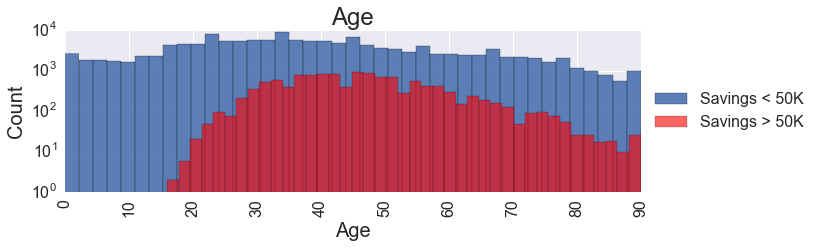

In [13]:
ax = plot_histograms(column='age', xlabel='Age', bins=41);

### wage_per_hour
According to the summary statistics displayed above, the 90% quantile for ***wage_per_hour*** is 0, and the hourly wage for the 99th percentile is 1530. The max value is 9999.0 (which seems like an artificial upper limit). As shown below, the minimum non-zero hourly wage is 20. These observations bring up some questions:
<ul>
<li> How do we interpret this data? Is this data correct? Are we to understand that 90% of the test set have no hourly income and that the minimum non-zero hourly wage is 20? Could this feature be mislabeled and in reality represent a quantity other than wage per hour?
<li> What are the units of this variable? If the units are dollars per hour, then why are there no minimum wage earners, which would be closer to \$7-\$15/hour rather than the non-zero minimum of 20? 
</ul>

Two histograms are plotted below for ***wage_per_hour***. Interestingly enough, there are more high wages greater than 4000 for the case where ***savings*** is less than 50K. 

These observations suggest some feature engineering is warranted for this variable. Here are some potential avenues of exploration:
<ol>
<li> A scaling could be introduced to reduce the range.
<li> To address the long tail, should we converting this feature from continuous to categorial, to perhaps binary or stratified? Is there a difference between somebody who earns 5,000 and 10,000?
</ol>



The minimum non-zero hourly wage is 20.
The number of people earning 0 is 141,594.
The number of people earning more than 0 is 11,302.



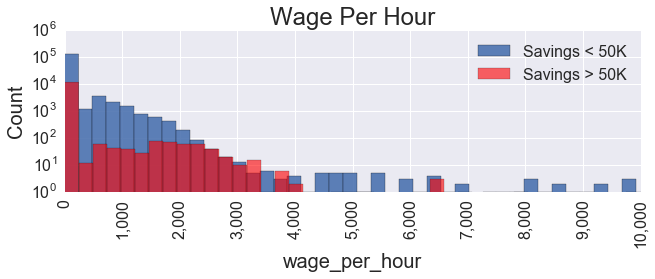

In [14]:
rich = raw_data['wage_per_hour'] > 0.0
not_rich = raw_data['wage_per_hour'] == 0.0

print '\nThe minimum non-zero hourly wage is {:g}.'.format(raw_data['wage_per_hour'][rich].min())
print 'The number of people earning 0 is {:,d}.'.format(not_rich.sum())
print 'The number of people earning more than 0 is {:,d}.\n'.format(rich.sum())

ax = plot_histograms(column='wage_per_hour', xlabel='wage_per_hour', title='Wage Per Hour', bins=41, legend_loc='in')
ax.set_xticks(range(0,10001,1000));
ax.set_xticklabels('{:,d}'.format(idx) for idx in range(0, 10001, 1000));

### capital_gains
Many of the observations made for the summary statistics of ***wage_per_hour*** also apply to ***capital_gains***. The majority of capital gains are 0, and the max is at 99,999. We have plotted the histograms below.

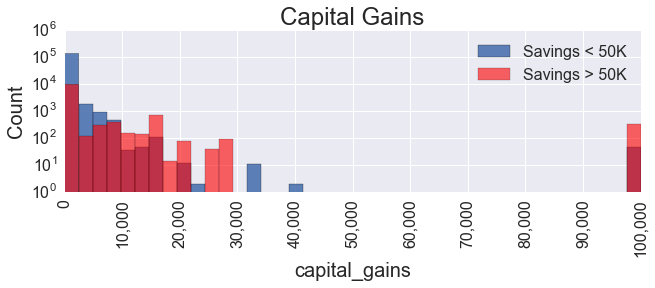

In [15]:
ax = plot_histograms(column='capital_gains', xlabel='capital_gains', title='Capital Gains', bins=41, legend_loc='in')
ax.set_xticks(range(0,100001,10000));
ax.set_xticklabels('{:,d}'.format(idx) for idx in range(0, 100001, 10000));

### capital_losses
Many of the observations made for the summary statistics of ***wage_per_hour*** also apply to ***capital_losses***. The majority of capital losses are 0. For this variable, the maximum value is 4,608, which does not seem limited by an artifical constraint.  We have plotted the histograms below.

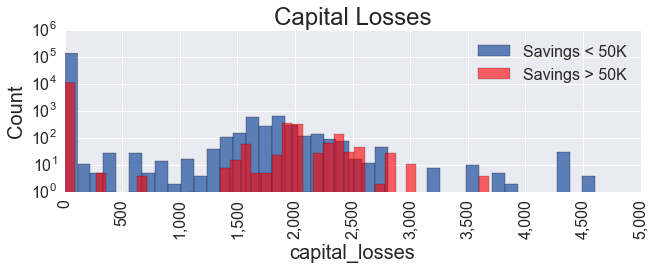

In [16]:
ax = plot_histograms(column='capital_losses', xlabel='capital_losses', title='Capital Losses', bins=41, legend_loc='in');
ax.set_xticks(range(0, 5001, 500));
ax.set_xticklabels('{:,d}'.format(idx) for idx in range(0, 5001, 500));

### dividends
The ***dividend*** variable exhibit different class imbalance for values greater than 0. We have plotted the histograms below.

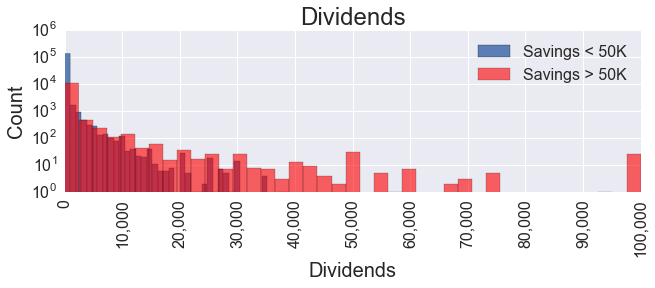

In [17]:
ax = plot_histograms(column='dividends', xlabel='Dividends', bins=41, legend_loc='in');
ax.set_xticks(range(0, 100001, 10000))
ax.set_xticklabels('{:,d}'.format(idx) for idx in range(0, 100001, 10000));

### num_persons_worked_for_employer
The histograms for ***num_persons_worked_for_employer*** are displayed below. One third of all persons in the data set do not employ other persons. The vertical axis of the histograms are on a linear scale to display the differences in the class counts. This displays the wide variability between class counts as well as the large class imbalance.

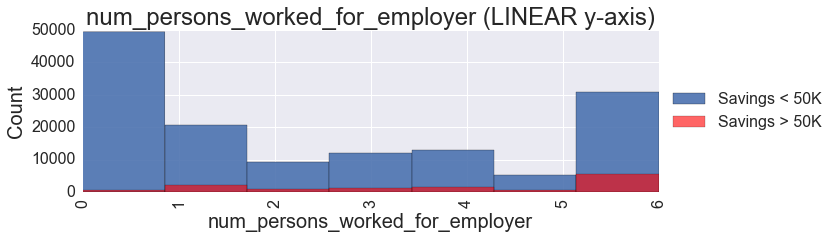

In [18]:
ax = plot_histograms(column='num_persons_worked_for_employer', xlabel='num_persons_worked_for_employer', 
                     title='num_persons_worked_for_employer (LINEAR y-axis)', bins=7);
ax.set_yscale('linear');
ax.set_ylim((0,50000));

## 3. Correlation Analysis
We calculate the correlation matrix of the continuous variables and also plot it as a colormap. We find that there are no strong correlations in the data.

In [19]:
corr = raw_data[continuous_columns].corr()

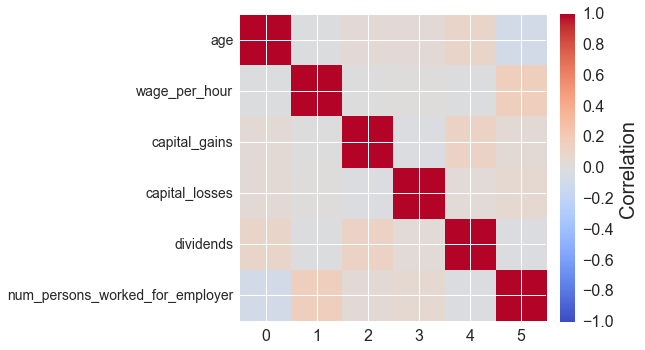

In [20]:
# plot correlation plot
fig, ax = plt.subplots(figsize=(6,6));
cax = ax.matshow(corr, cmap=plt.cm.coolwarm, vmin=-1, vmax=1);
cbar = plt.colorbar(cax, fraction=0.046, pad=0.04);
cbar.set_label('Correlation',size=20)
cbar.ax.tick_params(labelsize=16);
plt.yticks(range(corr.columns.values.shape[0]), fontsize=14);
ax.set_yticklabels(corr.columns.values);
ax.xaxis.set_ticks_position('bottom');
plt.xticks(fontsize=16);


## 4. The Nominal Columns
We use the function defined below to plot histograms for the nominal columns that do not have any missing or undefined values. There are 15 such variables. 

In [21]:
def plot_nominal_column(column, figsize=(10,3), legend_loc=None):
    '''
    This function graphs bar-plots of a given nominal column broken down by the savings variable.
    Since nominal data does not have numerical order, I chose to plot the bars by descending order of 
    counts for 0-savings persons.
    The vertical axis is on a log-scale.
    '''
    no_savings = raw_data[raw_data['savings']==0][[column,'savings']].groupby(column).count()
    no_savings.columns = ['0']
    
    has_savings = raw_data[raw_data['savings']==1][[column,'savings']].groupby(column).count()
    has_savings.columns = ['1']
    
    nominal_counts = pd.concat([no_savings, has_savings], axis=1)
    nominal_counts = nominal_counts.fillna(0).astype(np.int64)
    nominal_counts = nominal_counts.sort_values(by='1', ascending=False)
    nominal_counts['idx'] = np.array(range(nominal_counts.shape[0]))
    
    fig = plt.figure(figsize=figsize);
    ax = fig.gca();
    ax0 = nominal_counts.plot.bar(x='idx', y='0', ax=ax, alpha=0.8, logy=True);
    ax1 = nominal_counts.plot.bar(x='idx', y='1', ax=ax, color='r', alpha=0.5, logy=True);
    ax.set_ylim(bottom=0.5)
    ax.set_ylabel('Count', fontsize=20);
    ax.set_xlabel('')
    ax.set_xticks(nominal_counts.idx.values)
    ax.set_xticklabels(nominal_counts.index.values, rotation=45, fontsize=16, horizontalalignment='right');
    if legend_loc == 'in':
        ax.legend(('Savings < 50K', 'Savings > 50K'), fontsize=16);        
    else:
        ax.legend(('Savings < 50K', 'Savings > 50K'), fontsize=16, loc='center left', bbox_to_anchor=(1.0,0.5));
    title=ax.set_title(column, fontsize=24);
    return ax


For the most part, these variables do not exhibit any noteworthy behavior, with the exception of the following:
<ul>
<li> ***detailed_household_family_stat:*** This variable has many classes which do not map to the savings greater than 50K class. Perhaps these could be combined into one class.
</ul>

### citizenship

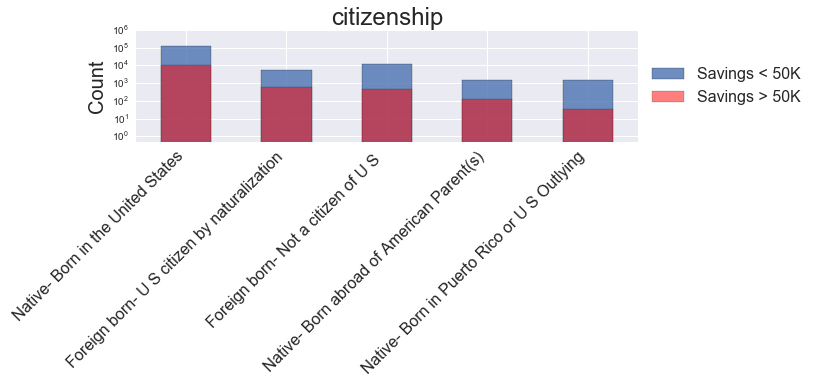

In [22]:
ax = plot_nominal_column('citizenship', figsize=(9,2));

### detailed_household_summary

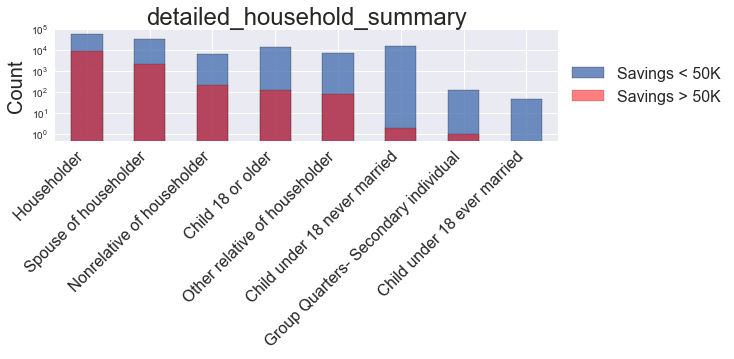

In [23]:
ax = plot_nominal_column('detailed_household_summary', figsize=(9,2));

### detailed_household_family_stat
This variable has many classes that do not map to the greater than 50K in savings. It might be beneficial to combine these into one class.

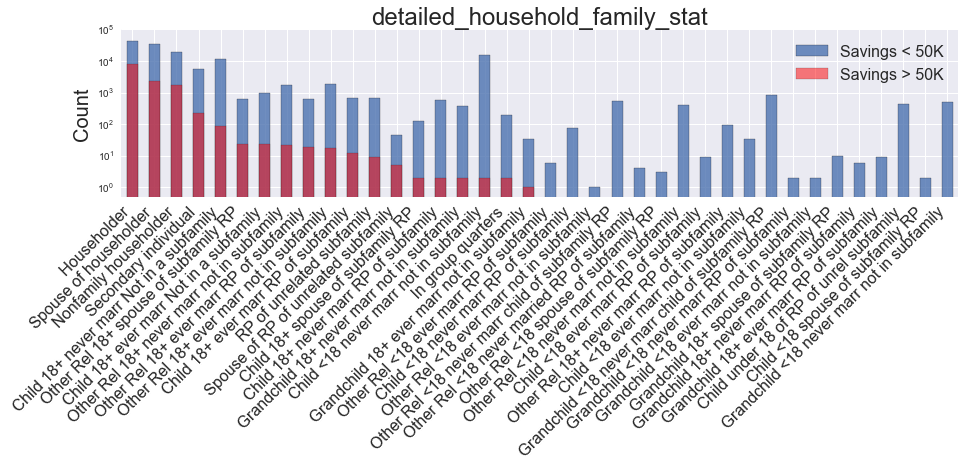

In [24]:
ax = plot_nominal_column('detailed_household_family_stat', figsize=(15,3), legend_loc='in');

### detailed_industry_code
The codes were not defined in the raw_data therefore it is unclear what industries these refer to.

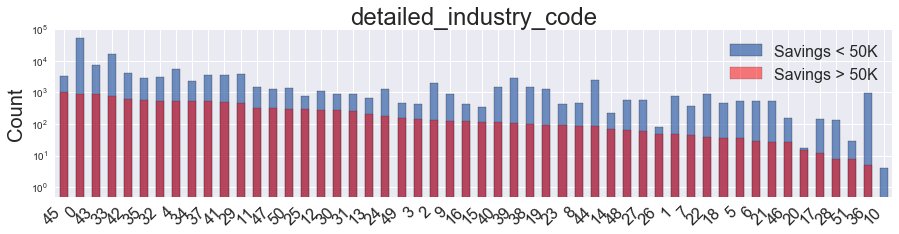

In [25]:
ax = plot_nominal_column('detailed_industry_code', figsize=(15,3), legend_loc='in');

### detailed_occupation_code
The codes were not defined in the raw_data therefore it is unclear what occupations these refer to.

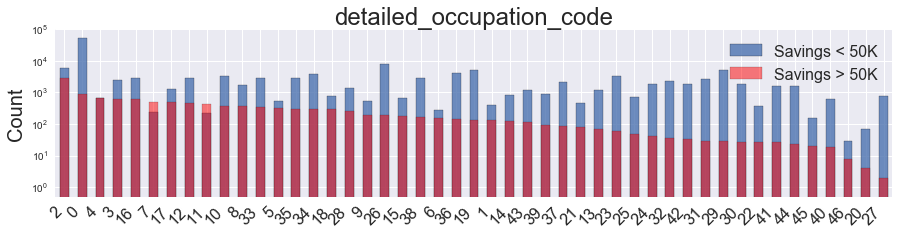

In [26]:
ax = plot_nominal_column('detailed_occupation_code', figsize=(15,3), legend_loc='in');

### education
There are 2 classes for which the imbalance is not present: "Prof school degree (MD DDS DVM LLB JD)" and "Doctorate degree (PhD EdD)".

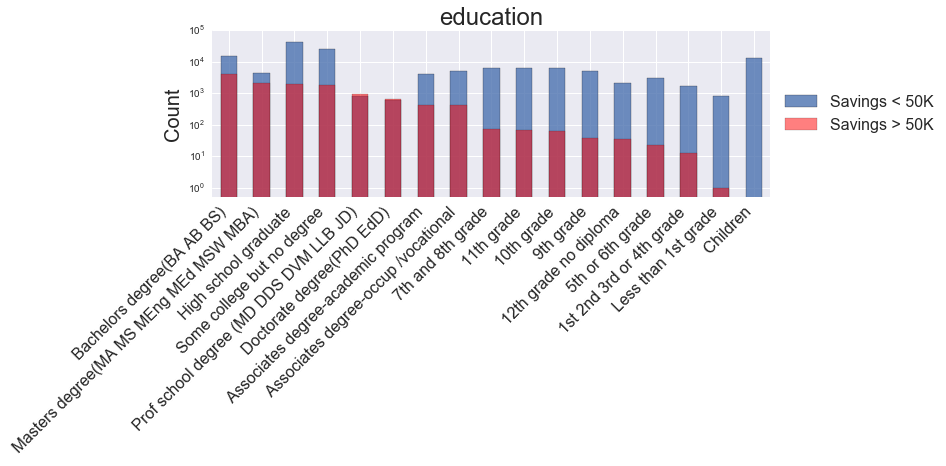

In [27]:
ax = plot_nominal_column('education');

### full_or_part_time_employment_stat

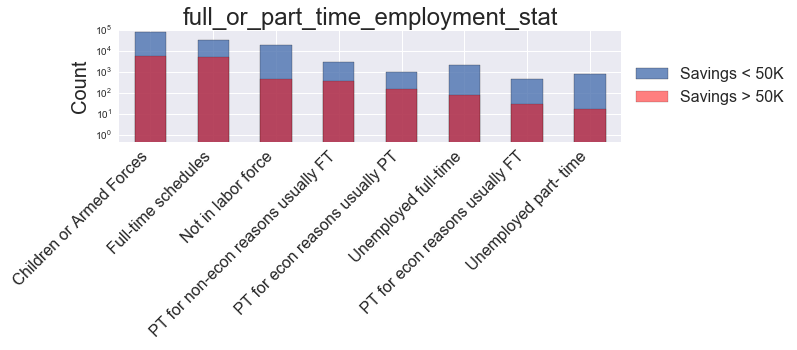

In [28]:
ax = plot_nominal_column('full_or_part_time_employment_stat', figsize=(9,2));

### marital_status

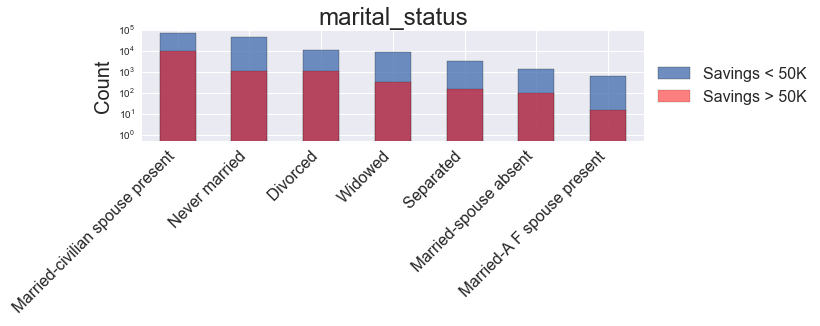

In [29]:
ax = plot_nominal_column('marital_status', figsize=(9,2));

### own_business_or_self_employed
The classes were not defined in the original data set, thus it is unclear what {0,1,2} refer to.

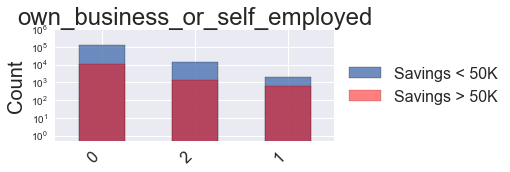

In [30]:
ax = plot_nominal_column('own_business_or_self_employed', figsize=(5,2));

### race

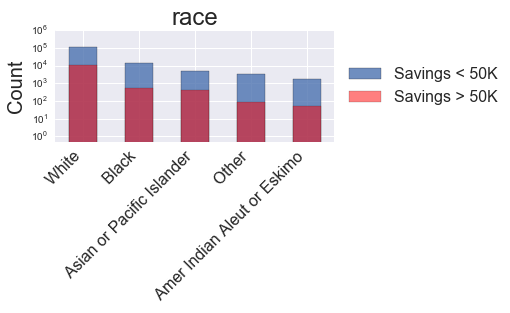

In [31]:
ax = plot_nominal_column('race', figsize=(5,2));

### sex

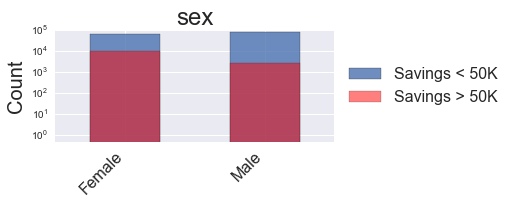

In [32]:
ax = plot_nominal_column('sex', figsize=(5,2));
ax.set_xticklabels(('Female', 'Male'));

### tax_filer

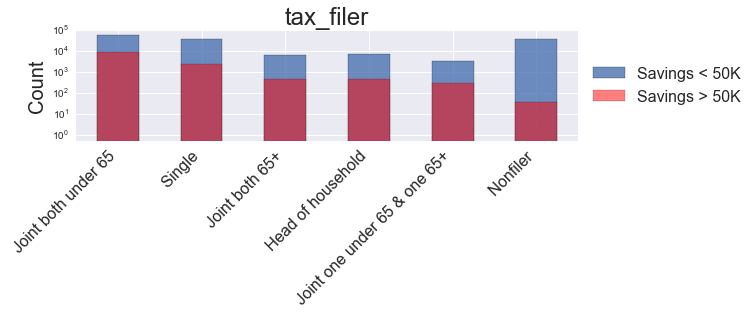

In [33]:
ax = plot_nominal_column('tax_filer', figsize=(9,2));

### veterans_benefits
The classes were not defined in the original data set, thus it is unclear what {0,1,2} refer to.

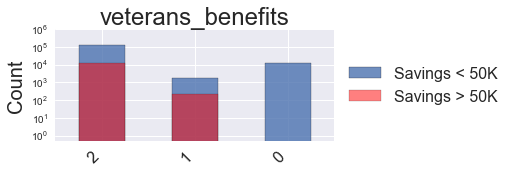

In [34]:
ax = plot_nominal_column('veterans_benefits', figsize=(5,2));

### weeks_worked_in_year
The most frequent number of weeks worked in a year are 52 followed by 0.

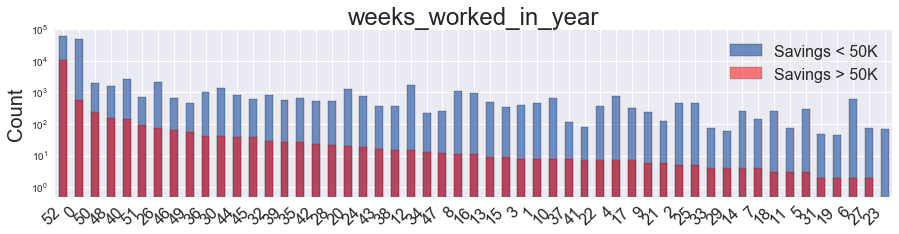

In [35]:
ax = plot_nominal_column('weeks_worked_in_year', figsize=(15,3), legend_loc='in');

### year
This variable determines when the data was collected: 1994 or 1995.

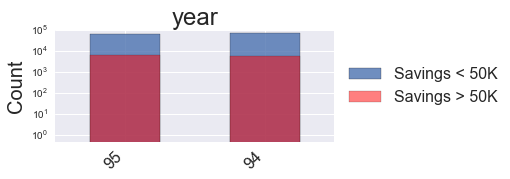

In [36]:
ax = plot_nominal_column('year', figsize=(5,2));

## 5. The Nominal Columns with Undefined or Missing Values
We examine each variable that has undefined or missing values. There are 19 such columns. The missing or undefined values generally come in the form of "Not in universe" or "?"s in some cases.

### class_of_worker
This feature has 9 classes. The value "Not in universe" is present for roughly one third of all observations. A histogram versus age is plotted below and this shows an approximately bimodal distribution. The peaks occur for ages less than 20 and greater than 60, suggesting that the majority of missing values "Not in universe" occurs for school age children and retirees.


The value "Not in universe" occurs in 35.43% of cases.





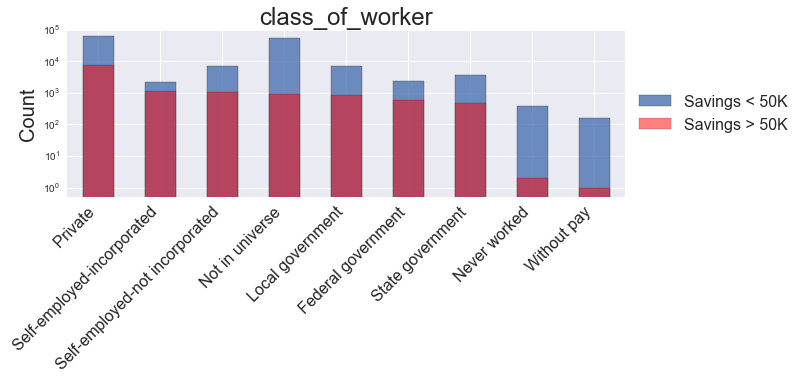

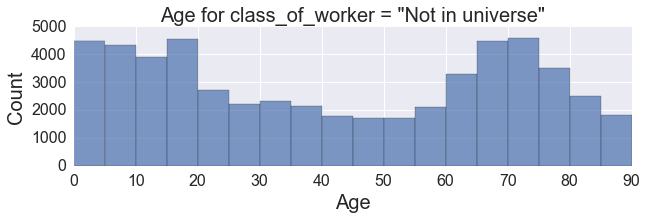

In [37]:
class_worker_na = raw_data['class_of_worker'].str.strip() == 'Not in universe'
total = raw_data['class_of_worker'].count()
print '\nThe value "Not in universe" occurs in {:.2f}% of cases.\n'.\
format(sum(class_worker_na)/float(total)*100)

plot_nominal_column('class_of_worker')

print 
fig=plt.figure(figsize=(10,2.5));
ax = fig.gca();
raw_data[class_worker_na].hist('age', ax=ax, bins=18, xlabelsize=16, ylabelsize=16, alpha=0.7);
ax.set_title('Age for class_of_worker = "Not in universe"', fontsize=20);
ax.set_xlabel('Age', fontsize=20);
ax.set_ylabel('Count', fontsize=20);
print


### reason_for_unemployment 
This variable has 6 distinct classes, displayed below. The vast majority of persons are uncategorized as "Not in universe".

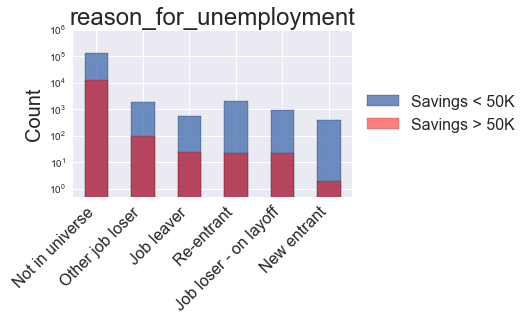

In [38]:
ax = plot_nominal_column('reason_for_unemployment', figsize=(5,3));

### member_of_labor_union 
This variable has 3 unique classes, displayed below. The vast majority of persons are uncategorized as "Not in universe". It might be worth investigating whether or not the "No" and "Not in universe" values should be combined.

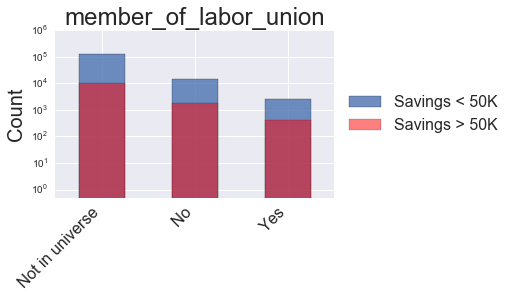

In [39]:
ax = plot_nominal_column('member_of_labor_union', figsize=(5,3));

### enrolled_in_edu_last_week
This feature has 3 classes. As to be expected, the majority of persons in the data set were not enrolled in either high school or college in the prior week. There are no surprises here.

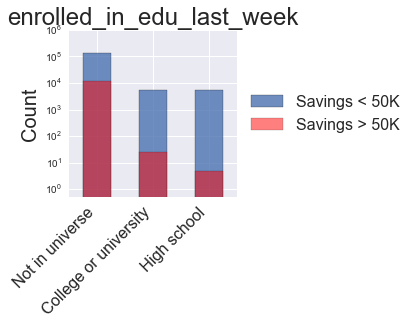

In [40]:
ax = plot_nominal_column('enrolled_in_edu_last_week', figsize=(3,3));

### major_industry_code
This variable has 24 distinct classes. The value "Not in universe or children" occurs in approximately 36% of all cases. This is consistent with the data for the ***class_of_worker*** variable.



The value "Not in universe or children" occurs in 35.68% of cases.



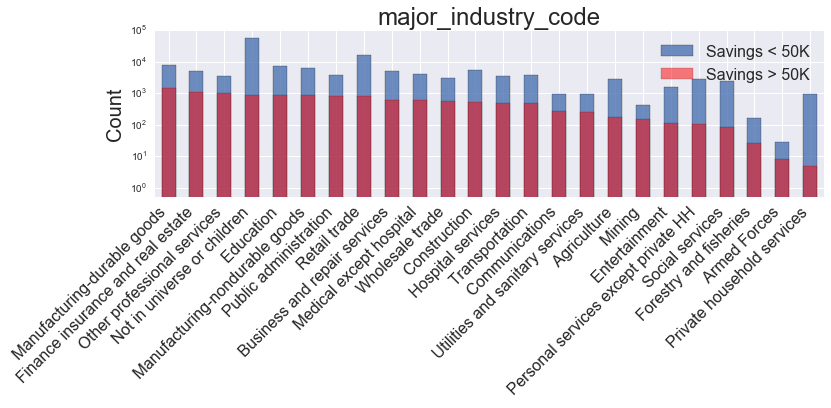

In [41]:
maj_ind_na = sum(raw_data['major_industry_code'].str.strip() == 'Not in universe or children')
total = raw_data['major_industry_code'].count()
print '\nThe value "Not in universe or children" occurs in {:.2f}% of cases.\n'.format(maj_ind_na/float(total)*100)
ax = plot_nominal_column('major_industry_code', figsize=(12,3), legend_loc='in');

### major_occupation_code
This variable has 15 distinct classes. The majority of persons have the "Not in universe" category. This number is equal to that for the ***majority_industry_code*** variable, so these are consistent.

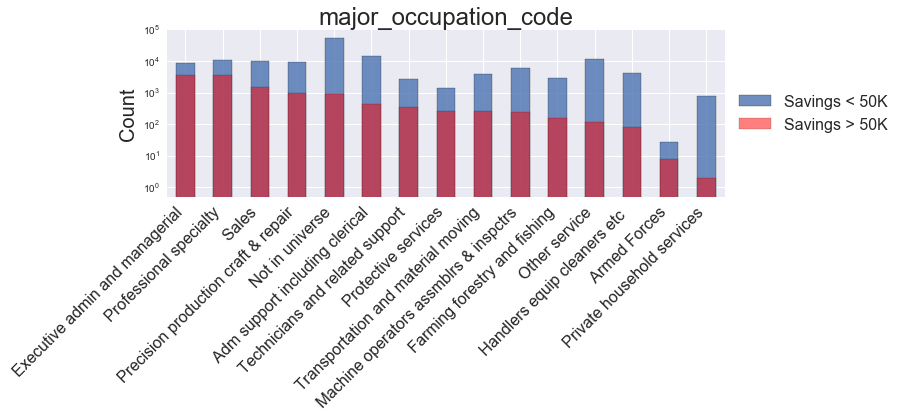

In [42]:
ax = plot_nominal_column('major_occupation_code');

### hispanic_origin
This variable has 10 unique classes, displayed below. There are 848 persons with value NA. 


The count for the value "NA" is 848.



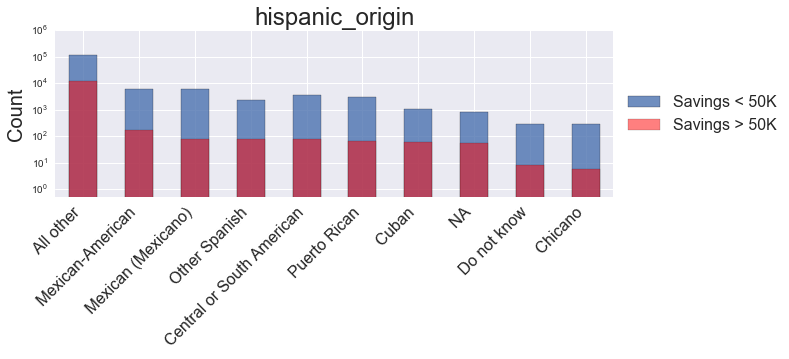

In [43]:
print '\nThe count for the value "NA" is {:d}.\n'.format((raw_data['hispanic_origin'].str.strip() == 'NA').sum())
ax = plot_nominal_column('hispanic_origin');

### region_of_previous_residence, state_of_previous_residence
The ***region_of_previous_residence*** variable has 6 distinct classes. The *** state_of_previous_residence*** variable has 51 distinct classes. Both variables have 137492 persons categorized as "Not in Universe". In addition, 698 persons are categorized with a question mark "?" for the ***state_of_previous_residence***


region_of_previous_residence value counts:

 Not in universe    137492
 South                4768
 West                 3997
 Midwest              3451
 Northeast            2661
 Abroad                527
Name: region_of_previous_residence, dtype: int64


state_of_previous_residence value counts of "?" and "Not in universe":

 Not in universe    137492
 ?                     698
Name: state_of_previous_residence, dtype: int64


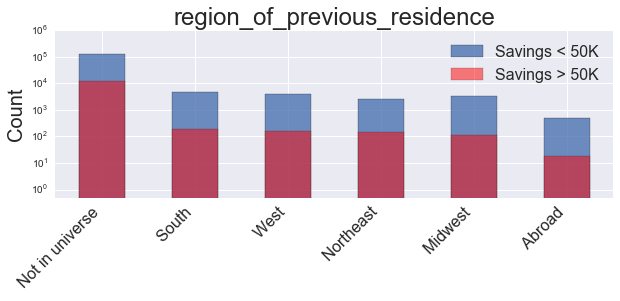

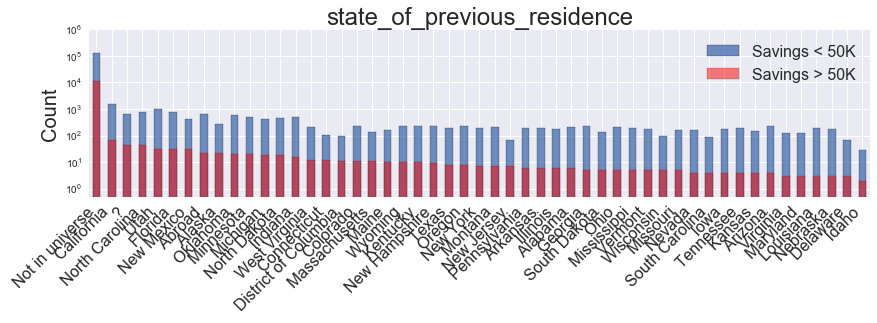

In [44]:
print "\nregion_of_previous_residence value counts:\n"
print raw_data['region_of_previous_residence'].value_counts()

spr_niu = raw_data['state_of_previous_residence'].str.strip() == "Not in universe"
spr_q = raw_data['state_of_previous_residence'].str.strip() == "?"

print '\n\nstate_of_previous_residence value counts of "?" and "Not in universe":\n'
print raw_data['state_of_previous_residence'][spr_niu | spr_q].value_counts()

ax = plot_nominal_column('region_of_previous_residence', legend_loc='in');
ax = plot_nominal_column('state_of_previous_residence', figsize=(14,3), legend_loc='in');


### migration_code_change_in_msa, migration_code_change_in_reg, migration_code_move_within_reg,  migration_prev_res_in_sunbelt
These variables provide some information on the person's movement within the last year. They share a lot of common classes. All four variables have an unknown class "?", which occurs the same number of times (approximately 75K). In addition, the following unknown variables are present "Not in universe", "Not identifiable".


                                 count(?)  count(Not in universe)  count(Not identifiable)    unique classes
migration_code_change_in_msa  :   74,944               344                   424                    10
migration_code_change_in_reg  :   74,944               344                     0                     9
migration_code_move_within_reg:   74,944               344                     0                    10
migration_prev_res_in_sunbelt :   74,944            62,548                     0                     4



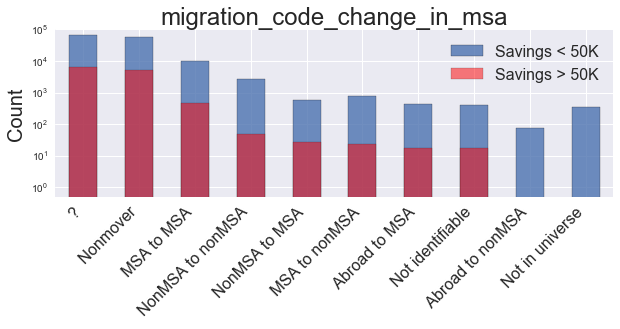

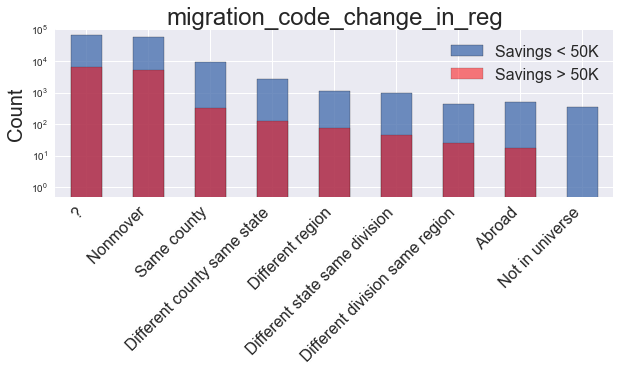

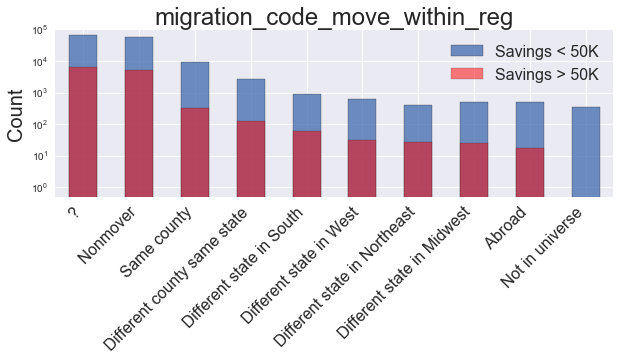

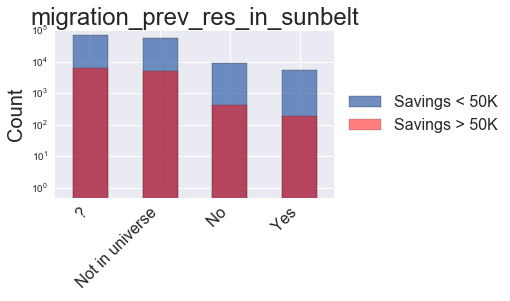

In [45]:
cols = ['migration_code_change_in_msa', 'migration_code_change_in_reg', 
        'migration_code_move_within_reg', 'migration_prev_res_in_sunbelt']
unique = []
print '\n{:>41s}{:>24s}{:>25s}{:>18s}'.format("count(?)", "count(Not in universe)", 
                                              "count(Not identifiable)", "unique classes")
for c in cols:
    print('{:30s}:{:9,d} {:17,d}{:22d}{:22d}'.format(c, (raw_data[c].str.strip() == "?").sum(), 
                                                    (raw_data[c].str.strip() == "Not in universe").sum(),
                                                    (raw_data[c].str.strip() == "Not identifiable").sum(),
                                                     len(raw_data[c].unique())))
print 
ax = plot_nominal_column('migration_code_change_in_msa', legend_loc='in');
ax = plot_nominal_column('migration_code_change_in_reg', legend_loc='in');
ax = plot_nominal_column('migration_code_move_within_reg', legend_loc='in');
ax = plot_nominal_column('migration_prev_res_in_sunbelt', figsize=(5,3));

### live_in_this_house_1_yr_ago 
This variable has 3 distinct values, displayed below. Roughly half of persons are labelled with "Not in universe under 1 year old".

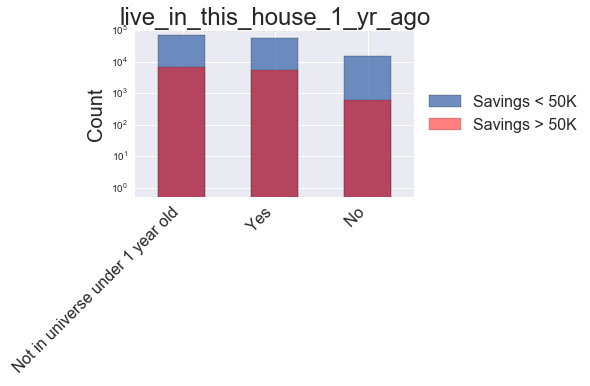

In [46]:
ax = plot_nominal_column('live_in_this_house_1_yr_ago', figsize=(5,3));

### family_members_under_18
This variable has 5 distinct values, displayed below. There are three classes for which there are zero persons with savings greater than 50K. Should we combine these into one?

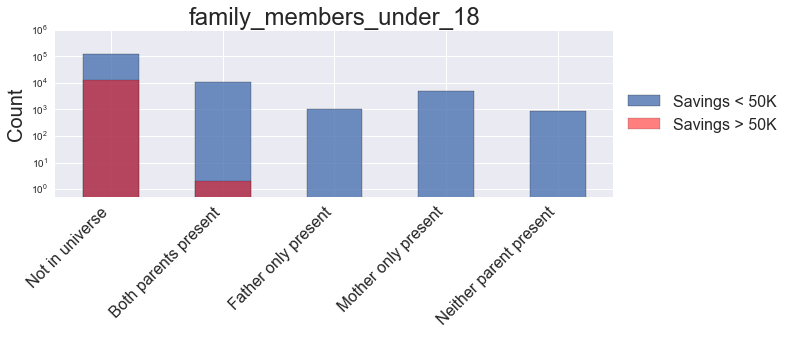

In [47]:
ax = plot_nominal_column('family_members_under_18');

### cob_father, cob_mother, cob_self
The variables ***cob_father***, ***cob_mother***, and ***cob_self*** each have 43 distinct values and also have 6383, 5810 and 3322 values mapped to the question mark "?", respectively.


               count("?")   unique values
cob_father:       6383            43
cob_mother:       5810            43
  cob_self:       3322            43


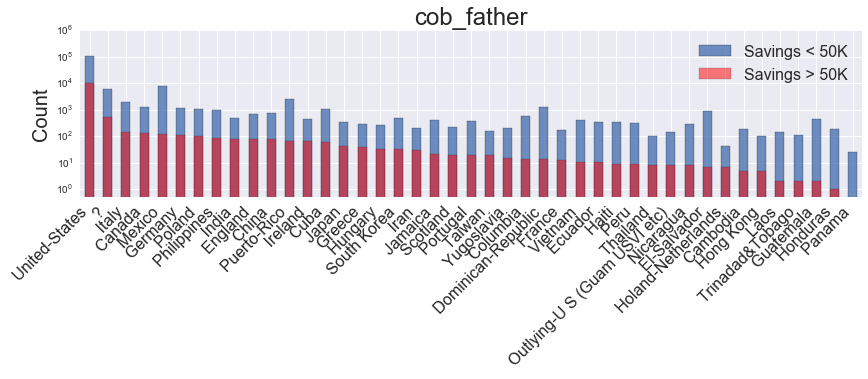

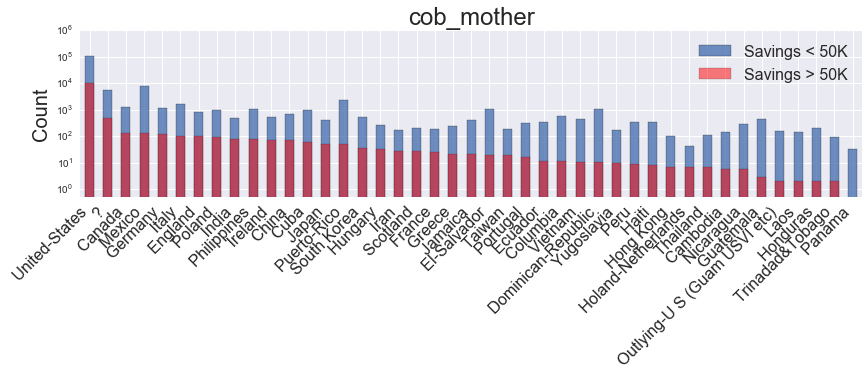

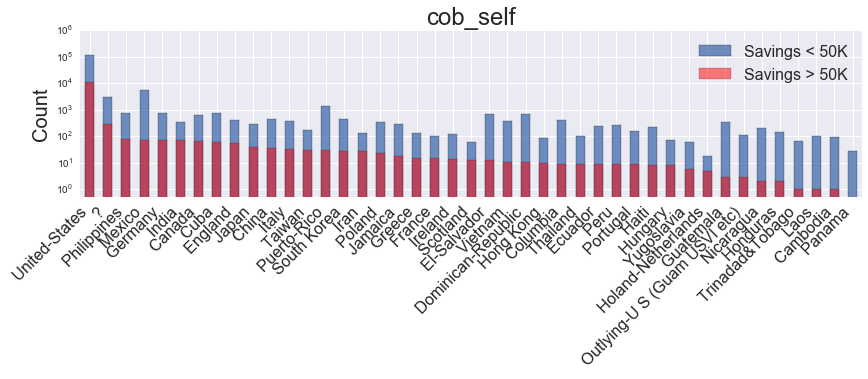

In [48]:
cobf = raw_data['cob_father'].str.strip() == "?"
cobm = raw_data['cob_mother'].str.strip() == "?"
cobs = raw_data['cob_self'].str.strip() == "?"

print '\n {:>24s} {:>15s}'.format('count("?")', 'unique values')
for name, col in zip(['cob_father', 'cob_mother', 'cob_self'],[cobf, cobm, cobs]):
    print '{:>10s}: {:10d} {:13d}'.format(name, raw_data[name][col].count(), raw_data[name].value_counts().shape[0])

ax = plot_nominal_column('cob_father', figsize=(14,3), legend_loc='in');
ax = plot_nominal_column('cob_mother', figsize=(14,3), legend_loc='in');
ax = plot_nominal_column('cob_self', figsize=(14,3), legend_loc='in');


### fill_in_questionnaire_for_veterans_admin
This variable has 3 distinct values, as shown below. The vast majority are mapped to "Not in universe".

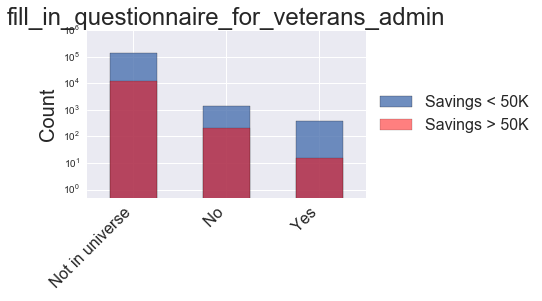

In [49]:
ax = plot_nominal_column('fill_in_questionnaire_for_veterans_admin', figsize=(5,3));

## 6. Examination of Class Imbalance
The training data exhibits a pretty severe degree of imbalance. Approximately 91% of all persons have savings less than 50K. This means that a model that classifies every person as having less than 50K in savings will be correct 91% of the time.

In [50]:
n = raw_data[raw_data['savings'] == 1]['savings'].count()
m = raw_data[raw_data['savings'] == 0]['savings'].count()

print '\nRecords with savings > 50K: {:8,d}'.format(n)
print 'Records with savings < 50K: {:8,d}'.format(m)
print 'The class imbalance is {:.2f}% or approximately {:d} to 1.\n'.format(float(n)/m*100, m/n)


Records with savings > 50K:   12,367
Records with savings < 50K:  140,529
The class imbalance is 8.80% or approximately 11 to 1.



The following function computes the class imbalance for a given column. It returns a DataFrame that stores the count of the number of persons for each class within the input column, broken down according to ***savings***, as well as the total number of elements for each class. The class imbalance is also calculated as the fraction of rows with savings less than 50K relative to the total count for each class. A ratio of 50% means the classes are perfectly balanced. The output is stored by increasing degree of imbalance. We display the imbalances for a few columns just for illustrative purposes.

In [51]:
def get_column_imbalance(column):
    
    no_savings = raw_data[raw_data['savings']==0][[column,'savings']].groupby(column).count()
    no_savings.columns = ['savings < 50K']
    
    has_savings = raw_data[raw_data['savings']==1][[column,'savings']].groupby(column).count()
    has_savings.columns = ['savings > 50K']
    
    total = raw_data[[column, 'savings']].groupby(column).count()
    total = total.fillna(0).astype(np.int64)
    total.columns = ['Total']
    assert total.sum().sum() == raw_data.shape[0], "The counts in the Total column are suspicious"
    
    x = pd.concat([no_savings, has_savings, total], axis=1)
    x = x.fillna(0).astype(np.int64)
    x['Imbalance'] = (1.0 - x['savings > 50K']/x['Total'])*100
    x = x.sort_values(by='Imbalance')
    return x


In [52]:
get_column_imbalance('family_members_under_18')

,savings < 50K,savings > 50K,Total,Imbalance
Not in universe,122594,12365,134959,90.837958
Both parents present,10861,2,10863,99.981589
Father only present,1028,0,1028,100.000000
Mother only present,5137,0,5137,100.000000
Neither parent present,909,0,909,100.000000


In [53]:
get_column_imbalance('education')

,savings < 50K,savings > 50K,Total,Imbalance
Prof school degree (MD DDS DVM LLB JD),823,968,1791,45.951982
Doctorate degree(PhD EdD),605,657,1262,47.939778
Masters degree(MA MS MEng MEd MSW MBA),4426,2034,6460,68.513932
Bachelors degree(BA AB BS),15480,3911,19391,79.830849
Associates degree-academic program,3910,412,4322,90.467376
Associates degree-occup /vocational,4838,411,5249,92.169937
Some college but no degree,24542,1787,26329,93.212807
High school graduate,41767,1875,43642,95.703680
12th grade no diploma,2025,34,2059,98.348713
7th and 8th grade,6237,72,6309,98.858773


In [54]:
get_column_imbalance('marital_status')

,savings < 50K,savings > 50K,Total,Imbalance
marital_status,,,,
Married-civilian spouse present,68256,9586,77842,87.685311
Divorced,11439,1065,12504,91.482726
Married-spouse absent,1420,96,1516,93.667546
Separated,3272,158,3430,95.393586
Widowed,8543,330,8873,96.280852
Never married,46956,1117,48073,97.676450
Married-A F spouse present,643,15,658,97.720365


In [55]:
get_column_imbalance('class_of_worker')

,savings < 50K,savings > 50K,Total,Imbalance
class_of_worker,,,,
Self-employed-incorporated,2126,1133,3259,65.234735
Federal government,2323,597,2920,79.554795
Self-employed-not incorporated,7234,1087,8321,86.936666
State government,3736,485,4221,88.509832
Local government,6880,846,7726,89.049961
Private,64422,7316,71738,89.801779
Not in universe,53265,900,54165,98.338410
Without pay,162,1,163,99.386503
Never worked,381,2,383,99.477807


## 7. Convert nominal columns from dtype Object to dtype Integer
We convert the nominal columns that have string types to integers. This is a form of preprocessing that is necessary in order to calculate correlations and to perform feature importance.

In [56]:
def convert_dataframe():
    # create new DataFrame that contains columns of type object 
    data = pd.DataFrame(raw_data.select_dtypes(include=['object']))
    columns = data.columns
    
    for column in columns:
        unique_values = data[column].unique()
        dictionary = {key:idx for idx,key in enumerate(unique_values)}
        data[column] = data[column].apply(lambda x : dictionary[x])

    return data


In [57]:
data = convert_dataframe()

# add nominal columns that were already integer and didn't need to be converted
nominal_integer_columns = [c[0] for c in the_columns if c[1] == 'nominal' and c[0] not in data.columns]
data[nominal_integer_columns] = raw_data[nominal_integer_columns]

# add 'sex', 'year' and continuous columns
data['sex'] = raw_data['sex']
data['year'] = raw_data['year']

# add continuous columns
continuous_columns = [c[0] for c in the_columns if c[1] == 'continuous']
data[continuous_columns] = raw_data[continuous_columns]

# add target (savings)
data['savings'] = raw_data['savings']

# verify that we aren't missing any columns
assert set(data.columns) == (set(raw_data.columns))

print data.shape

(152896, 41)


In [58]:
data.head()

,class_of_worker,education,enrolled_in_edu_last_week,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,member_of_labor_union,reason_for_unemployment,...,weeks_worked_in_year,sex,year,age,wage_per_hour,capital_gains,capital_losses,dividends,num_persons_worked_for_employer,savings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,95,73,0,0,0,0,0,0
1,1,1,0,1,1,1,0,0,0,0,...,52,1,94,58,0,0,0,0,1,0
2,0,2,1,2,0,0,1,0,0,0,...,0,0,95,18,0,0,0,0,0,0
3,0,3,0,2,0,0,0,0,0,0,...,0,0,94,9,0,0,0,0,0,0
4,0,3,0,2,0,0,0,0,0,0,...,0,0,94,10,0,0,0,0,0,0


## 8. Feature Importance
We fit the data to a random forest and logistic regression with L1 regularization. The purpose is not to develop a classification model, but to get a notion of the variable importance of the data set. We perform cross-validation just to make sure the models produce reasonable results, though stress that accuracy is not the goal.

In [59]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [60]:
# obtain training and test set for cross-validation
y = data.loc[:,'savings']
X = data.drop('savings', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print 'size of training data: {:7d}, {:3d}'.format(X_train.shape[0], X_train.shape[1])
print 'size of test data:     {:7d}, {:3d}'.format(X_test.shape[0], X_test.shape[1])


size of training data:  107027,  40
size of test data:       45869,  40


### Random Forest
We train a random forest with 100 trees, report the accuracy and then plot the feature importances for the top 15 features.

In [61]:
def top_n_feature_importance(n, importances, columns, figsize=(9,14)):
    n = min(n,len(importances))
    
    indices = np.argsort(importances)
    idx = indices[-n:]
    labels = [text for text in columns[idx]]
    
    plt.figure(figsize=figsize)
    plt.title("Top {:d} Feature Importances".format(n), fontsize=24)
    plt.barh(bottom=range(n), width=importances[idx], alpha=0.5)
    plt.yticks([0.4 + k for k in range(n)], labels, fontsize=12)
    plt.ylim([0, n])
    plt.xticks(fontsize=16)
    plt.show()


In [62]:
# Train random forest using 1000 trees

rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print 'Random Forest accuracy = {:.4f}'.format(accuracy_score(y_test, y_pred))

importances = rf_clf.feature_importances_
rf_idx = np.argsort(importances)

Random Forest accuracy = 0.9396


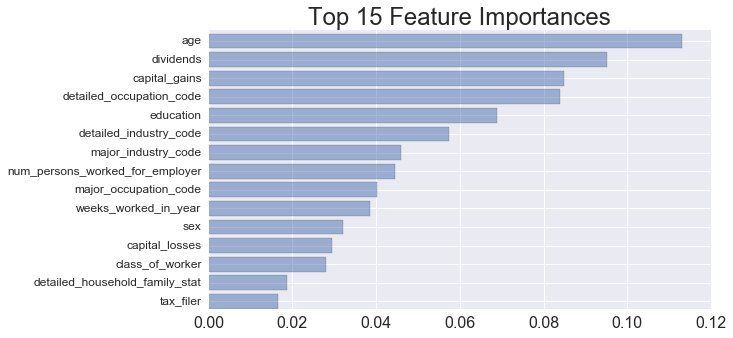

In [63]:
top_n_feature_importance(15, importances, X.columns, figsize=(9,5))

### Logistic Regression with L1 Regularization

In [64]:
lr1_clf = LogisticRegression(C=0.001, penalty='l1', tol=0.01)
lr1_clf.fit(X_train, y_train)
y_pred = lr1_clf.predict(X_test)
print 'accuracy = {:.4f}'.format(accuracy_score(y_test, y_pred))

accuracy = 0.9297


In [65]:
logr_idx = np.nonzero(lr1_clf.coef_)[1]
print X.columns[logr_idx]

Index([u'class_of_worker', u'education', u'major_industry_code',
       u'hispanic_origin', u'state_of_previous_residence',
       u'detailed_household_family_stat', u'detailed_household_summary',
       u'detailed_occupation_code', u'weeks_worked_in_year', u'sex', u'year',
       u'age', u'wage_per_hour', u'capital_gains', u'capital_losses',
       u'dividends', u'num_persons_worked_for_employer'],
      dtype='object')


### Intersection of Both Sets of Feature Importance
Now that we have determined the important features via random forest and logist regression, what are the common elements between the two?

In [66]:
n = len(logr_idx)
common_columns = sorted(list(set(X.columns[logr_idx]).intersection(X.columns[rf_idx[-n:]])))
for col in common_columns:
    print col

age
capital_gains
capital_losses
class_of_worker
detailed_household_family_stat
detailed_occupation_code
dividends
education
major_industry_code
num_persons_worked_for_employer
sex
weeks_worked_in_year


These results make intuitive sense. It is not surprising that ***age***, ***capital_gains***, ***capital_losses***, ***dividends***, ***education***, ***major_industry_code*** and ***detailed_industry_code*** are included.

## 9. Conclusion
Based on this analysis, the following investigations should be carried out during the modelling phase:
<ul>
<li> ***wage_per_hour:*** explore rescaling, special treatment of tails
<li> ***capital_gains:*** explore rescaling, special treatment of tails
<li> ***capital_losses:*** explore rescaling, special treatment of tails
<li> ***family_members_under_18:*** has three classes that are 100% imbalanced. Combine into one?
<li> ***detailed_household_family_stat:*** has many classes that are 100% imbalanced. Combine into one?
</ul>

Lastly, the severe class imbalance in the target variable ***savings*** suggests we should be clever about assessing the performance of the classifier and using use techniques that can focus on this imbalance, such as undersampling, oversampling, various clustering approaches and more... 
